In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [ ]:
df = pd.read_csv("fake_job_postings.csv",  engine = 'python')

In [ ]:
print(df.shape)
# Lấy thông tin về kiểu dữ liệu của từng cột trong DataFrame
data_types = df.dtypes
# Lọc các cột có kiểu dữ liệu số
numeric_columns = data_types[data_types != 'object']
print("Các biến số:")
print(numeric_columns)

# Lọc các cột có kiểu dữ liệu văn bản
text_columns = data_types[data_types == 'object']
print("Các biến dạng văn bản:")
print(text_columns)

(17880, 18)
Các biến số:
job_id              int64
telecommuting       int64
has_company_logo    int64
has_questions       int64
fraudulent          int64
dtype: object
Các biến dạng văn bản:
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
dtype: object


# Tiền Xử Lí Dữ Liệu

In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Kiểm tra số lượng giá trị thiếu cho từng cột
missing_values = df.isnull().sum()

# Hiển thị số lượng giá trị thiếu trong từng cột
print("Số lượng giá trị thiếu cho từng cột:")
print(missing_values)


Số lượng giá trị thiếu cho từng cột:
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [ ]:
df.fillna(" ",inplace = True)

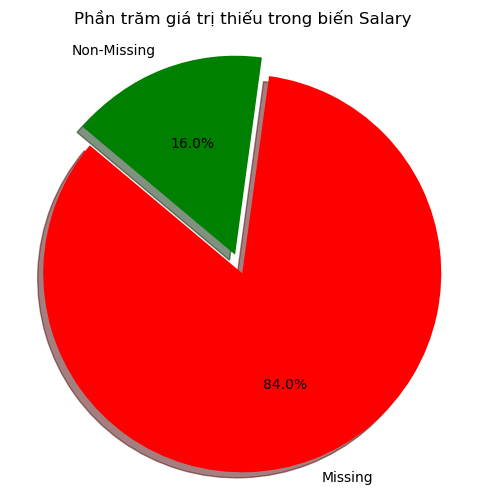

In [ ]:
import matplotlib.pyplot as plt

# Tính phần trăm giá trị thiếu trong biến salary_range
missing_salary = df['salary_range'].isnull().sum()
total_values = len(df['salary_range'])
percentage_missing = (missing_salary / total_values) * 100

# Tạo biểu đồ tròn
labels = ['Missing', 'Non-Missing']
sizes = [percentage_missing, 100 - percentage_missing]
colors = ['red', 'green']
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Phần trăm giá trị thiếu trong biến Salary')
plt.show()


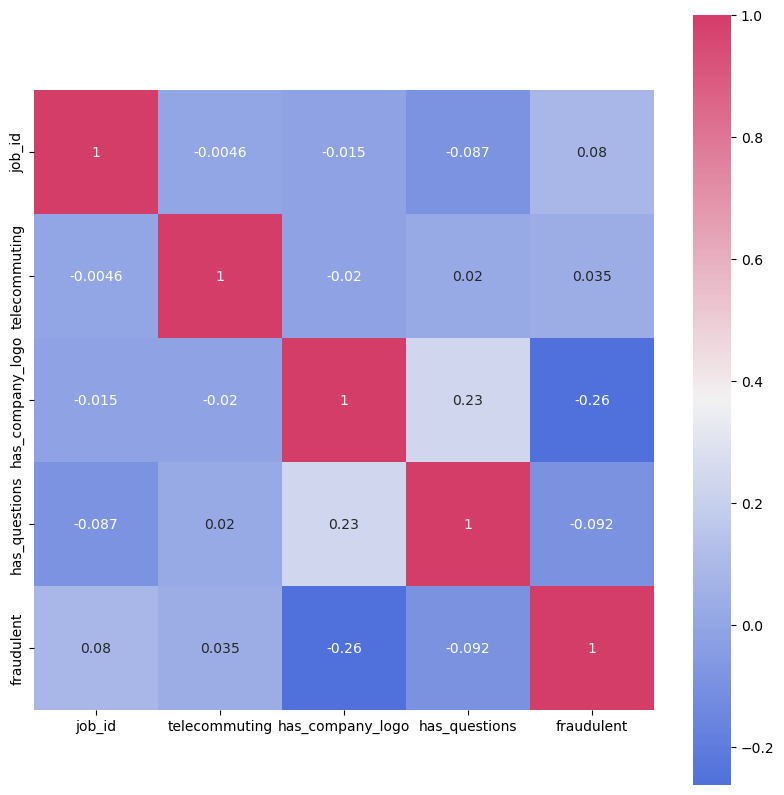

In [ ]:
import seaborn as sns
import numpy as np
numeric_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 10))
corr = numeric_cols.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(-100, 0, as_cmap=True), square=True, annot=True)
plt.show()

In [ ]:
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['required_experience'] + ' ' + df['industry'] + ' ' + df['function']

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
df.text = df.text.apply(lambda x: re.sub(r'[?|!|\'|"|#|+]', r'', x))
df.text = df.text.apply(lambda x: re.sub("\S*\d\S*", "", x).strip())
df.text = df.text.apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))
df.text = df.text.apply(lambda x: ' '.join(e.lower() for e in x.split() if e.lower() not in stop))

In [ ]:
import nltk
from nltk.corpus import wordnet
# Define lemmatizer
lemmatizer = nltk.WordNetLemmatizer()

# Function to lemmatize words
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

# Apply lemmatization to the 'text' column
df['text'] = df['text'].apply(lemmatize_words)

In [ ]:
df['text']

0        marketing intern u ny new york marketing weve ...
1        customer service cloud video production nz auc...
2        commissioning machinery assistant cma u ia wev...
3        account executive washington dc u dc washingto...
4        bill review manager u fl fort worth spotsource...
                               ...                        
17875    account director distribution ca toronto sale ...
17876    payroll accountant u pa philadelphia accountin...
17877    project cost control staff engineer cost contr...
17878    graphic designer ng la lagos nemsia studio loo...
17879    web application developer nz n wellington engi...
Name: text, Length: 17880, dtype: object

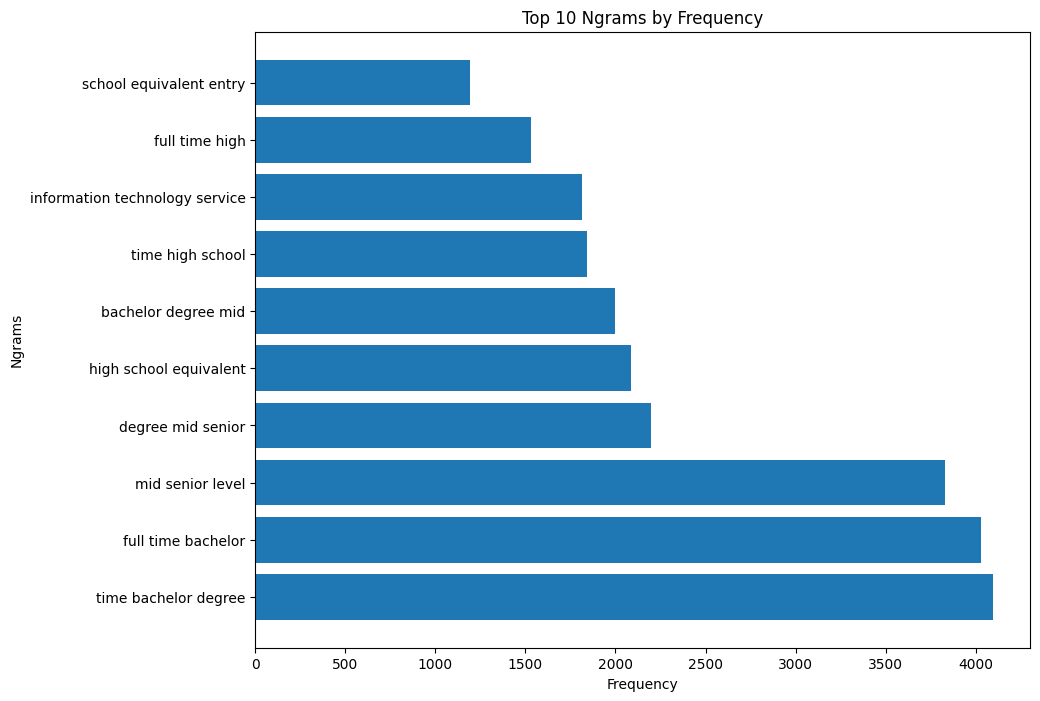

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt

all_text = ' '.join(df['text'])
tokens = word_tokenize(all_text)

# Hàm tạo ngrams
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

n = 3 #trigram

# Tạo ngrams
ngrams_list = generate_ngrams(tokens, n)
ngram_freq = Counter(ngrams_list)
ngram_freq_df = pd.DataFrame(list(ngram_freq.items()), columns=['Ngram', 'Frequency'])

# Sắp xếp theo frequency
ngram_freq_df = ngram_freq_df.sort_values(by='Frequency', ascending=False)

# Biểu đồ hiển thị top 10 ngrams theo frequency
plt.figure(figsize=(10, 8))
plt.barh(ngram_freq_df['Ngram'].apply(lambda x: ' '.join(x))[:10], ngram_freq_df['Frequency'][:10])
plt.xlabel('Frequency')
plt.ylabel('Ngrams')
plt.title('Top 10 Ngrams by Frequency')
plt.show()

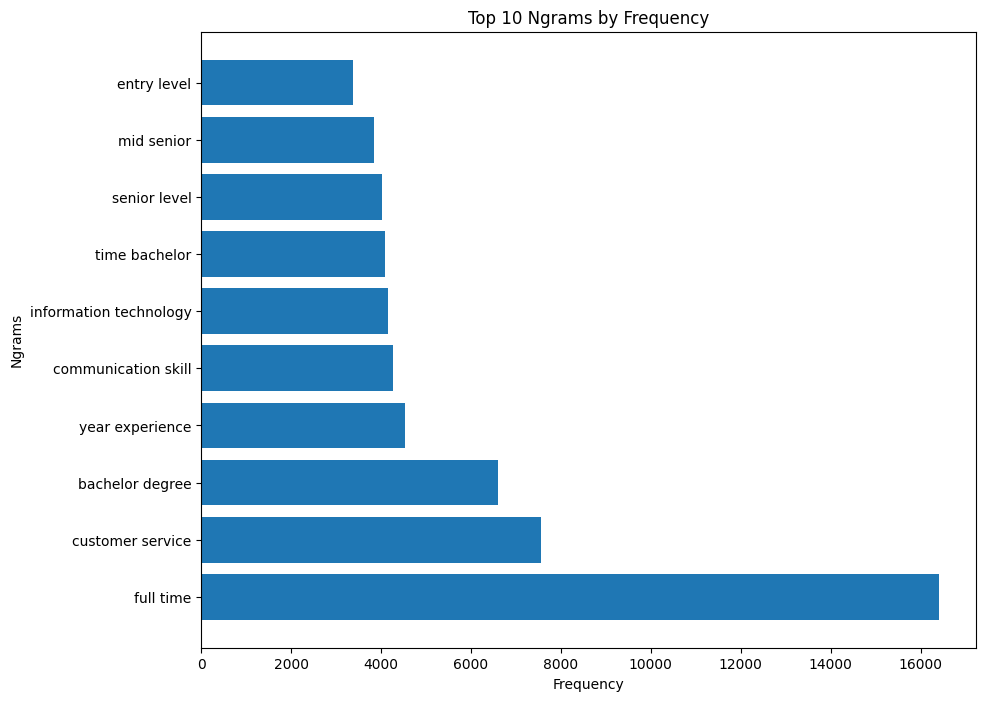

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt

all_text = ' '.join(df['text'])
tokens = word_tokenize(all_text)

# hàm tạo ngrams
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

n = 2 #biggram

# Tạo ngrams
ngrams_list = generate_ngrams(tokens, n)
ngram_freq = Counter(ngrams_list)
ngram_freq_df = pd.DataFrame(list(ngram_freq.items()), columns=['Ngram', 'Frequency'])

# sắp xếp theo frequency
ngram_freq_df = ngram_freq_df.sort_values(by='Frequency', ascending=False)

# Biểu đồ hiển thị top 10 ngrams theo frequency
plt.figure(figsize=(10, 8))
plt.barh(ngram_freq_df['Ngram'].apply(lambda x: ' '.join(x))[:10], ngram_freq_df['Frequency'][:10])
plt.xlabel('Frequency')
plt.ylabel('Ngrams')
plt.title('Top 10 Ngrams by Frequency')
plt.show()

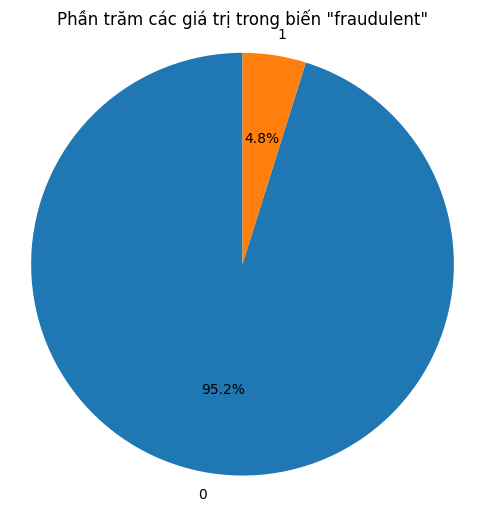

In [ ]:
import matplotlib.pyplot as plt

# Tính phần trăm các giá trị
fraudulent_percentage = df['fraudulent'].value_counts(normalize=True) * 100

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(fraudulent_percentage, labels=fraudulent_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Phần trăm các giá trị trong biến "fraudulent"')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df['text']
y = df['fraudulent']

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

X_Train, X_test, y_Train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# SMOTE
smote = SMOTE(random_state=42)
X_Train_resampled, y_Train_resampled = smote.fit_resample(X_Train, y_Train)

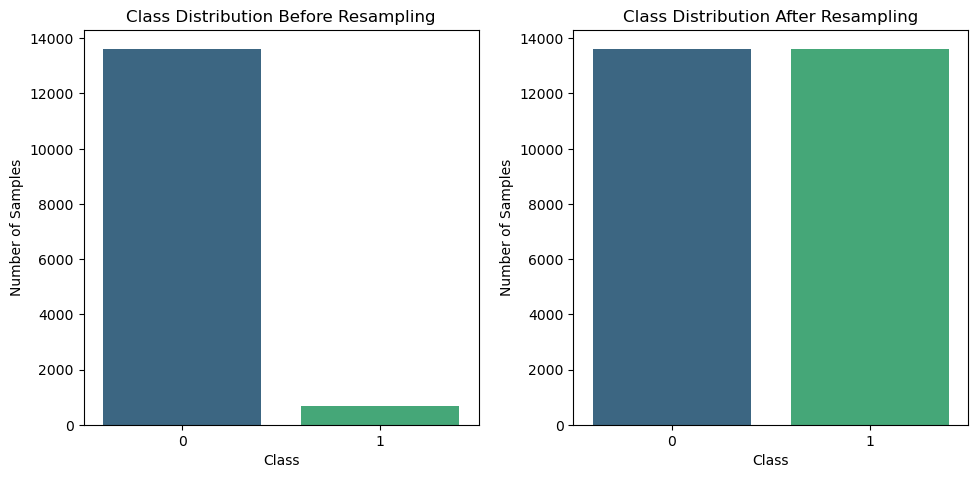

In [ ]:
# Số lượng mẫu ban đầu trong mỗi lớp
initial_class_counts = pd.Series(y_Train).value_counts()

# Số lượng mẫu sau khi cân bằng
resampled_class_counts = pd.Series(y_Train_resampled).value_counts()

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.barplot(x=initial_class_counts.index, y=initial_class_counts.values, palette='viridis')
plt.title('Class Distribution Before Resampling')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

plt.subplot(1, 2, 2)
sns.barplot(x=resampled_class_counts.index, y=resampled_class_counts.values, palette='viridis')
plt.title('Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

plt.tight_layout(pad=1.5)

plt.show()

# Xây Dựng Mô Hình

## Machine Learning

### Naive Bayes và Ensemble Learning(AdaBoost)

In [ ]:
pip install comet_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.8/586.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 550.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 27.9 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.7.0
    Uninstalling websocket-client-1.7.0:
      Successfully uninstalled websocket-client-1.7.0
  Attempting uninstall: python-box
    Found existing installation: python-box 7.1.1
    Uninstalling python-box-7.1.1:
      Successfully uninstalled python-box-7.1.1


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

from comet_ml                import ConfusionMatrix
from sklearn                 import metrics
from sklearn.metrics         import accuracy_score, confusion_matrix
from sklearn.metrics         import auc,roc_curve
from sklearn.metrics         import precision_score, recall_score, f1_score

In [ ]:
naive_model=MultinomialNB()
params = {
        'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
        }
clf = GridSearchCV(naive_model, param_grid=params, scoring='f1', cv=4)
clf.fit(X_Train_resampled, y_Train_resampled)

GridSearchCV(cv=4, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000, 10000]},
             scoring='f1')

In [ ]:
best_alpha = clf.best_params_['alpha']

In [ ]:
print(f"Alpha tốt nhất cho mô hình Naive Bayes là = {best_alpha}")

Alpha tốt nhất cho mô hình Naive Bayes là = 1e-05


In [ ]:
ab_model = AdaBoostClassifier(MultinomialNB(alpha=best_alpha))
params = {
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'n_estimators': [50, 100, 200]
}
clf = GridSearchCV(ab_model, param_grid=params, scoring='f1', cv=4)
clf.fit(X_Train_resampled, y_Train_resampled)

GridSearchCV(cv=4,
             estimator=AdaBoostClassifier(base_estimator=MultinomialNB(alpha=1e-05)),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [ ]:
print(f"learning rate tốt nhất cho Ensemble learning = {clf.best_params_['learning_rate']}")
print(f"số lượng estimators tốt nhất cho Ensemble learning = {clf.best_params_['n_estimators']}")

learning rate tốt nhất cho Ensemble learning = 0.1
số lượng estimators tốt nhất cho Ensemble learning = 50


In [ ]:
best_model_nb = clf.best_estimator_

In [ ]:
y_pred_nb = best_model_nb.predict(X_test)

In [ ]:
def classification_eval_nb(y_test, y_pred):
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1
## Đánh giá mô hình bằng các chỉ số
scores = classification_eval_nb(y_test, y_pred_nb)

## Hiển thị giá trị cá chỉ số
print(f'accuray   = {(scores[0] * 100):.1f}%')
print(f'precision = {(scores[1] * 100):.1f}%')
print(f'recall    = {(scores[2] * 100):.1f}%')
print(f'f1        = {(scores[3] * 100):.1f}%')

accuray   = 98.6%
precision = 88.8%
recall    = 83.4%
f1        = 86.0%


In [ ]:
cm=confusion_matrix(y_test,y_pred_nb)
cm_df = pd.DataFrame(cm, index=[0,1], columns=[0,1])
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'

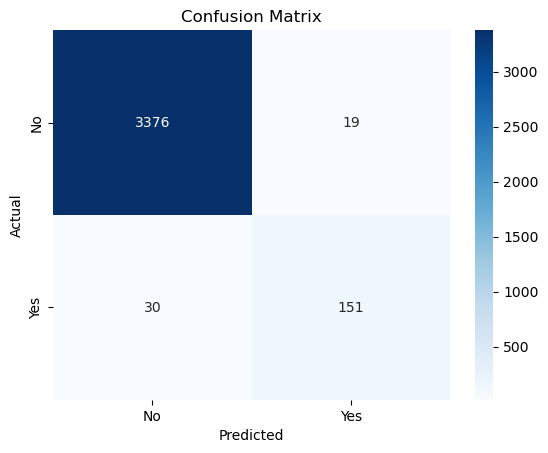

In [ ]:
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Maxent Model

### SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Tạo mô hình SGDClassifier
sgd_classifier = SGDClassifier(loss='log_loss',random_state=42)

# Thiết lập danh sách các giá trị hyperparameters cần thử nghiệm
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 1],
    'max_iter': [100, 200, 300]
}

# Sử dụng GridSearchCV để tìm hyperparameters tốt nhất
grid_search = GridSearchCV(sgd_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_Train_resampled, y_Train_resampled)

# Hiển thị hyperparameters tốt nhất
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model_sgd = grid_search.best_estimator_

Best Hyperparameters: {'alpha': 0.0001, 'eta0': 1, 'learning_rate': 'adaptive', 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
best_model_sgd

SGDClassifier(eta0=1, learning_rate='adaptive', loss='log_loss', max_iter=100,
              random_state=42)

In [ ]:
# Đánh giá mô hình trên tập kiểm thử
best_model_sgd = grid_search.best_estimator_
y_pred_sgd = best_model_sgd.predict(X_test)

In [ ]:
def classification_eval_sgd(y_test, y_pred):
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1
## Đánh giá mô hình bằng các chỉ số
scores = classification_eval_sgd(y_test, y_pred_sgd)

## Hiển thị giá trị cá chỉ số
print(f'accuray   = {(scores[0] * 100):.1f}%')
print(f'precision = {(scores[1] * 100):.1f}%')
print(f'recall    = {(scores[2] * 100):.1f}%')
print(f'f1        = {(scores[3] * 100):.1f}%')

accuray   = 98.5%
precision = 90.6%
recall    = 79.6%
f1        = 84.7%


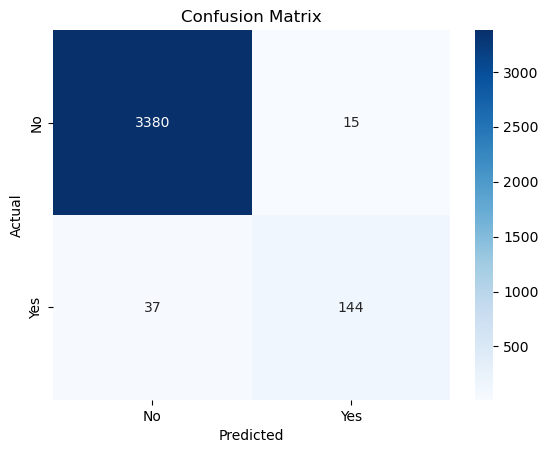

In [ ]:
cm=confusion_matrix(y_test,y_pred_sgd)
cm_df = pd.DataFrame(cm, index=[0,1], columns=[0,1])
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Deep Learning

### LSTM

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import LSTM,GRU,Bidirectional,Dense,Embedding
from tensorflow.keras import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
seq = tokenizer.texts_to_sequences(df['text'])
vec = pad_sequences(seq,padding='post',maxlen=50)

In [ ]:
X = np.array(vec)
y = np.array(df['fraudulent'])
X_Train_lstm, X_test_lstm, y_Train_lstm, y_test_lstm = train_test_split(X, y, test_size=0.2, random_state=42)
# SMOTE
smote = SMOTE(random_state=42)
X_Train_resampled_lstm, y_Train_resampled_lstm = smote.fit_resample(X_Train_lstm, y_Train_lstm)
# Chia thêm tập validation set từ training set để có thể đánh giá theo dõi trong quá trình huấn luyện
X_Train_resampled_lstm, X_validation, y_Train_resampled_lstm, y_validation = train_test_split(X_Train_resampled_lstm, y_Train_resampled_lstm, test_size=0.2, random_state=42)

In [ ]:
# Xây dựng mô hình LSTM
model_lmts = Sequential()
model_lmts.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=50))
model_lmts.add(Bidirectional(LSTM(units=100)))
model_lmts.add(Dense(1, activation='sigmoid'))
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Biên soạn và huấn luyện mô hình
model_lmts.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model_lmts.fit(X_Train_resampled_lstm, y_Train_resampled_lstm, epochs=10, validation_data=(X_validation, y_validation), batch_size=32, callbacks=[early_stopping])


Epoch 1/10


681/681 [==============================] - 161s 225ms/step - loss: 0.2143 - accuracy: 0.9197 - val_loss: 0.1728 - val_accuracy: 0.9431
Epoch 2/10
681/681 [==============================] - 147s 216ms/step - loss: 0.0677 - accuracy: 0.9785 - val_loss: 0.1422 - val_accuracy: 0.9512
Epoch 3/10
681/681 [==============================] - 148s 217ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.1701 - val_accuracy: 0.9477
Epoch 4/10
681/681 [==============================] - 145s 212ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.1617 - val_accuracy: 0.9477
Epoch 5/10
681/681 [==============================] - 140s 206ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.1955 - val_accuracy: 0.9442


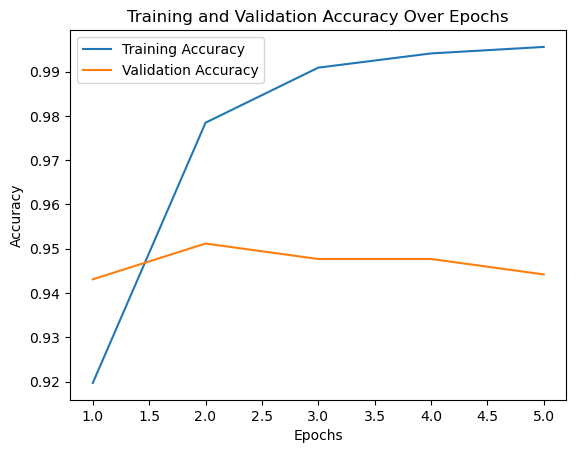

In [ ]:
# Extract accuracy values from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the accuracy over epochs
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_lmts.evaluate(X_test_lstm,y_test_lstm)

112/112 [==============================] - 2s 19ms/step - loss: 0.1775 - accuracy: 0.9376


[0.1774694323539734, 0.9376398324966431]

In [ ]:
# Dự đoán xác suất cho mỗi lớp
y_prob_lstm = model_lmts.predict(X_test_lstm)
# Chuyển đổi xác suất thành dự đoán nhị phân
y_pred_lstm = (y_prob_lstm > 0.5).astype(int)

112/112 [==============================] - 2s 15ms/step


In [ ]:
def classification_eval_lstm(y_test, y_pred):
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1
## Đánh giá mô hình bằng các chỉ số
scores = classification_eval_lstm(y_test, y_pred_lstm)

## Hiển thị giá trị cá chỉ số
print(f'accuray   = {(scores[0] * 100):.1f}%')
print(f'precision = {(scores[1] * 100):.1f}%')
print(f'recall    = {(scores[2] * 100):.1f}%')
print(f'f1        = {(scores[3] * 100):.1f}%')

accuray   = 93.8%
precision = 42.2%
recall    = 63.0%
f1        = 50.6%


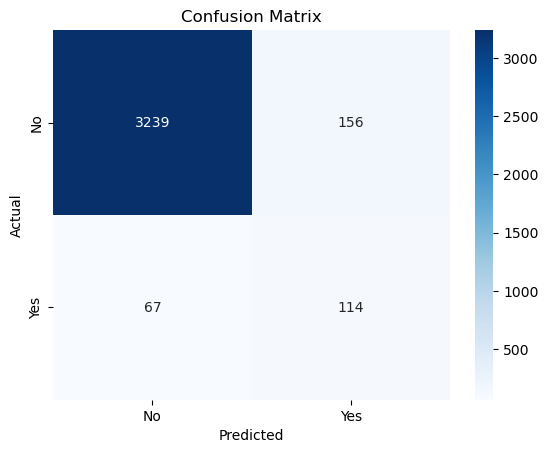

In [ ]:
cm=confusion_matrix(y_test,y_pred_lstm)
cm_df = pd.DataFrame(cm, index=[0,1], columns=[0,1])
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

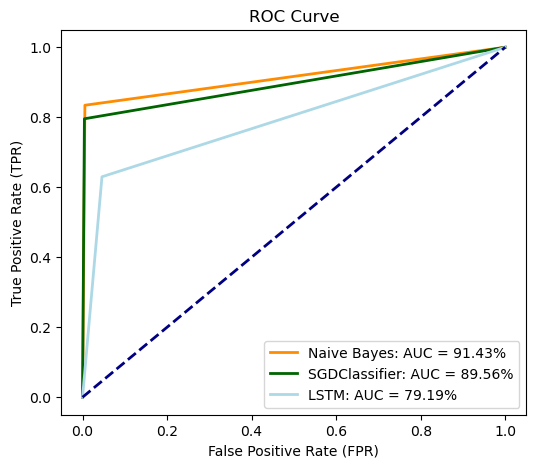

In [ ]:
fpr_nb, tpr_nb, thresholds = roc_curve(y_test, y_pred_nb)
auc_nb = metrics.auc(fpr_nb, tpr_nb)
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_pred_sgd)
auc_sgd = metrics.auc(fpr_sgd, tpr_sgd)
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_test_lstm, y_pred_lstm)
auc_lstm = metrics.auc(fpr_lstm, tpr_lstm)
# Vẽ ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'Naive Bayes: AUC = {round(auc_nb*100, 2)}%')
plt.plot(fpr_sgd, tpr_sgd, color='darkgreen', lw=2, label=f'SGDClassifier: AUC = {round(auc_sgd*100, 2)}%')
plt.plot(fpr_lstm, tpr_lstm, color='lightblue', lw=2, label=f'LSTM: AUC = {round(auc_lstm*100, 2)}%')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Tạo Giao Diện Ứng Dụng

In [ ]:
import tkinter as tk
from tkinter import messagebox
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
import re
import string

# Preprocessing functions
def preprocess_text(text):
    stop = set(stopwords.words('english'))
    punctuation = list(string.punctuation)
    stop.update(punctuation)
    text = re.sub(r'[?|!|\'|"|#|+]', r'', text)
    text = re.sub("\S*\d\S*", "", text).strip()
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in stop)
    return text

# Create Tkinter app
root = tk.Tk()
root.title("Dự đoán Fraudulent")

# Function to predict using the trained model
def predict():
    text = ' '.join([entry.get() for entry in entry_fields])
    processed_text = preprocess_text(text)
    lemmatized_text = lemmatize_words(processed_text)

    # Trước khi dự đoán, chuyển đổi lemmatized_text thành một mảng 2 chiều
    X_new = tfidf_vectorizer.transform([lemmatized_text])
    # Reshape thành dạng 2 chiều
    X_new_reshaped = X_new.toarray().reshape(1, -1)

    prediction = best_model_nb.predict(X_new_reshaped)

    if prediction == 1:
        messagebox.showinfo("Kết quả", "Dự đoán: Đây là tin tuyển dụng giả")
    else:
        messagebox.showinfo("Kết quả", "Dự đoán: Đây là tin tuyển dụng thật")

# Create labels and entry fields
labels = ['Title', 'Location', 'Department', 'Company Profile', 'Description', 'Requirements', 'Benefits', 'Employment Type', 'Required Education', 'required_experience', 'Industry', 'Function']
entry_fields = []
for idx, label_text in enumerate(labels):
    label = tk.Label(root, text=label_text)
    label.grid(row=idx, column=0, sticky='w')
    entry = tk.Entry(root)
    entry.grid(row=idx, column=1)
    entry_fields.append(entry)


# Function to start prediction
predict_button = tk.Button(root, text="Dự đoán", command=predict)
predict_button.grid(row=len(labels)+1, columnspan=2)
root.mainloop()
